# Lecture 25 – Data 100, Summer 2024

Data 100, Summer 2024

[Acknowledgments Page](https://ds100.org/su24/acks/)

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from transformers import GPT2Tokenizer, GPT2Model
import torch

model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token

def get_embeddings(words):
    inputs = tokenizer(words, return_tensors="pt", padding=True, truncation=True, max_length=10)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings

words = [
         "man", 
         "woman", 
         "apple", 
         "orange", 
        "banana",
         "peach",
        "pants",
         "t-shirt",
        "suit",
         "tie",
        "sneakers"]

embeddings = get_embeddings(words)

/srv/conda/envs/notebook/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


## Projection and Clustering

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


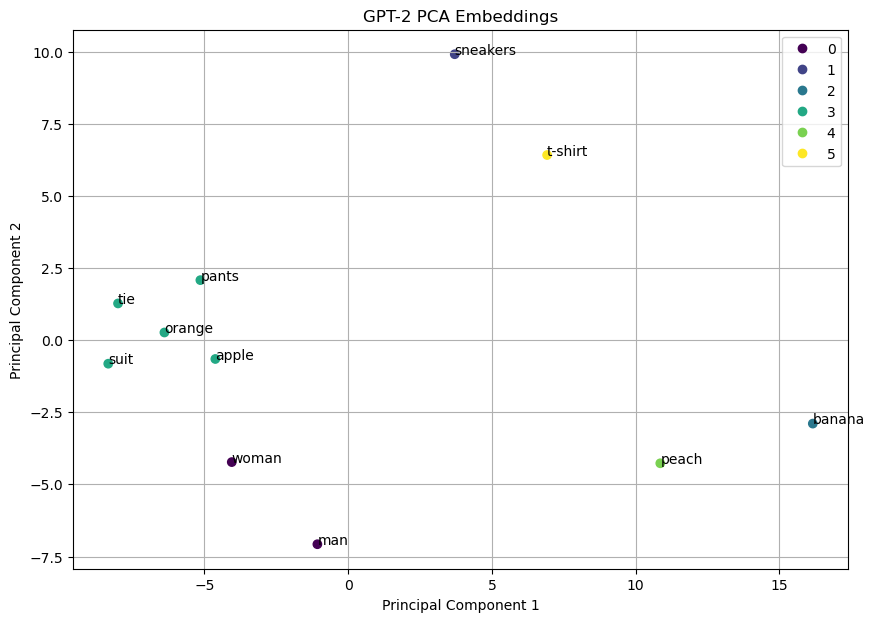

In [118]:
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

kmeans = KMeans(n_clusters=6, random_state=0)
clusters = kmeans.fit_predict(reduced_embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap="viridis")

for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters))
plt.title("GPT-2 PCA Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show();

### Another set of words!

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


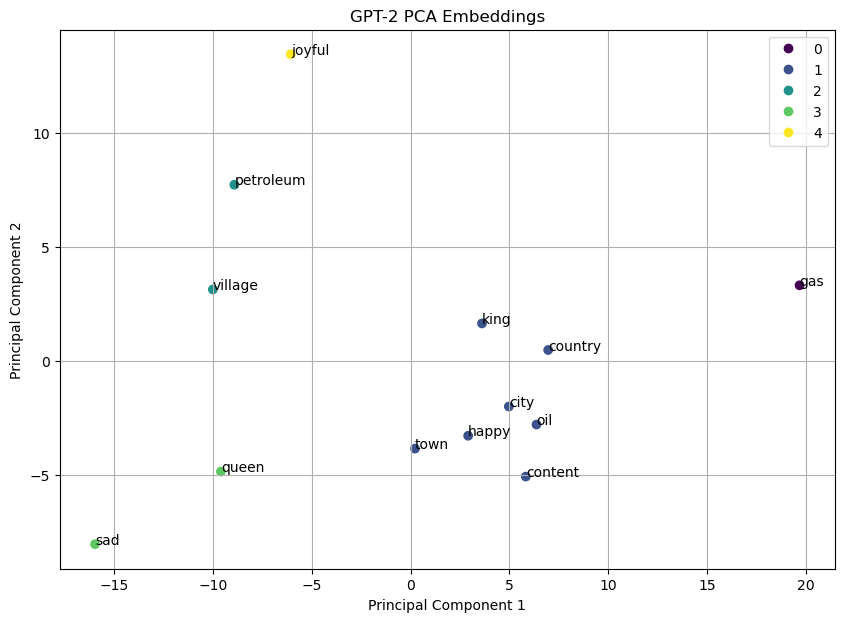

In [119]:
words = ['king', 'queen', 'oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'content', 'petroleum', 'joyful']
embeddings = get_embeddings(words)
pca = PCA(n_components=3)
reduced_embeddings = pca.fit_transform(embeddings)

kmeans = KMeans(n_clusters=5, random_state=90)
clusters = kmeans.fit_predict(reduced_embeddings)

plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=clusters, cmap="viridis")

for i, word in enumerate(words):
    plt.annotate(word, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters))
plt.title("GPT-2 PCA Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show();